# Solving Optimization Problems with `scipy.optimize.minimize`

The `scipy.optimize.minimize` function in Python is a powerful tool for solving optimization problems. It provides a range of algorithms to minimize scalar functions of one or more variables. This tutorial will guide you through the process of using `minimize` to solve optimization problems step-by-step.

For more details, check the official [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Prerequisites

Make sure you have `scipy` installed. If not, you can install it using pip:

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Required Modules

Start by importing the necessary libraries:

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Step 2: Define the Objective Function

Define the function you want to minimize. For example, let's minimize the following quadratic function:

$$
    f(x) = (x - 3)^2 + 4
$$

Here is the corresponding Python code:

In [3]:
def objective_function(x):
    return (x - 3)**2 + 4

### Visualizing the Function

Before running the optimization, it's often helpful to visualize the function. You can use `matplotlib` to plot the function over a range of values:

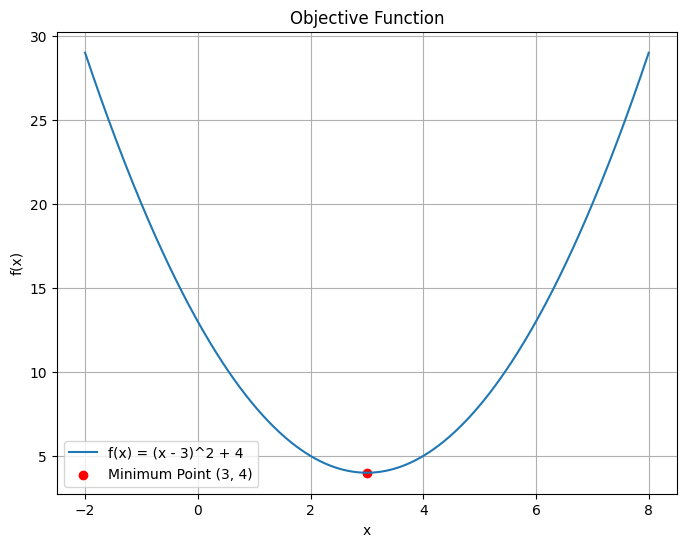

In [4]:
# Define a range of x values
x = np.linspace(-2, 8, 500)
y = (x - 3)**2 + 4

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = (x - 3)^2 + 4")
plt.scatter(3, 4, color='red', label="Minimum Point (3, 4)")
plt.title("Objective Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

## Step 3: Set an Initial Guess

Provide an initial guess for the solution. This is a required parameter for `minimize`.

In [5]:
initial_guess = [0]  # Starting point for the optimization

## Step 4: Call the `minimize` Function

Use the `minimize` function to solve the optimization problem. You can specify the method to use for the optimization. For example, we use the "BFGS" method here:

In [6]:
result = minimize(objective_function, initial_guess, method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.000000000000001
        x: [ 3.000e+00]
      nit: 2
      jac: [ 5.960e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

## Step 5: Analyze the Results

The result returned by `minimize` is an object containing detailed information about the optimization process. You can extract the optimized parameters and the minimum value of the objective function:

In [7]:
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [3.00000003]
Minimum Value: 4.000000000000001


## Adding Constraints

`scipy.optimize.minimize` also allows you to include constraints. For example, to add bounds or equality/inequality constraints:

### Example with Bounds

In [8]:
bounds = [(0, None)]  # x >= 0
result = minimize(objective_function, initial_guess, bounds=bounds, method='L-BFGS-B')
print("Optimized Parameters with Bounds:", result.x)

Optimized Parameters with Bounds: [3.00000004]


### Example with Constraints

In [9]:
def constraint_function(x):
    return x[0] - 1  # x >= 1

constraints = {'type': 'ineq', 'fun': constraint_function}
result = minimize(objective_function, initial_guess, constraints=constraints)
print("Optimized Parameters with Constraints:", result.x)

Optimized Parameters with Constraints: [3.]


## Minimizing a Function with Two Parameters

Consider a function with two parameters:

$$
    f(x, y) = (x - 1)^2 + (y - 2)^2
$$

This function has a minimum at \((x, y) = (1, 2)\). Here's how to minimize it:

In [10]:
def objective_function_2d(vars):
    x, y = vars
    return (x - 1)**2 + (y - 2)**2

# Initial guess
initial_guess = [0, 0]

# Perform optimization
result = minimize(objective_function_2d, initial_guess, method='BFGS')

# Print results
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [0.99999999 1.99999999]
Minimum Value: 1.705780445775116e-16


### Visualizing the Function

For two variables, you can visualize the function as a contour plot:

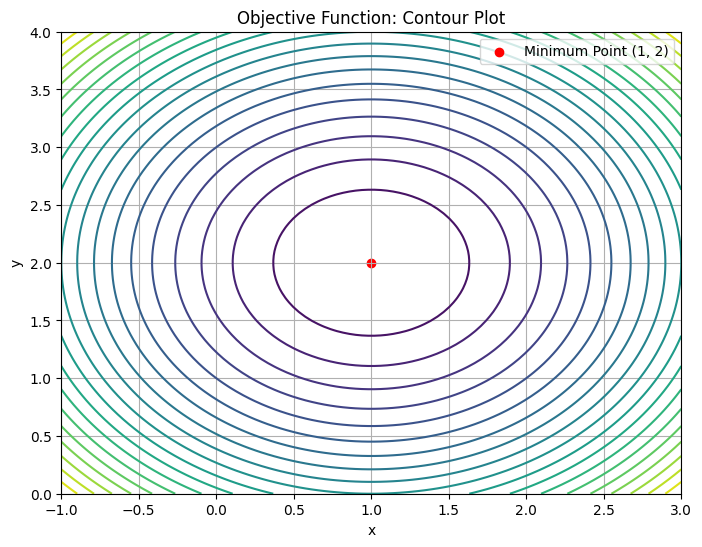

In [11]:
x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
x, y = np.meshgrid(x, y)
z = (x - 1)**2 + (y - 2)**2

plt.figure(figsize=(8, 6))
plt.contour(x, y, z, levels=20, cmap='viridis')
plt.scatter(1, 2, color='red', label="Minimum Point (1, 2)")
plt.title("Objective Function: Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()